In [12]:
import pandas as pd
from fbprophet import Prophet

In [13]:
#import sample manning data
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df.head()                 

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [14]:
# create new Prophet object and pass in the historical dataframe
m = Prophet(daily_seasonality=True)
m.fit(df)

C:\Users\pchen4\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
# Extend dataframe into the future a specified number of days using the helper method Prophet.make_future_dataframe.
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [15]:
# Get predicted value yhat for future values with uncertainty intervals
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210819,7.518094,8.918211
3266,2017-01-16,8.535836,7.858120,9.209292
3267,2017-01-17,8.323262,7.639294,9.038426
3268,2017-01-18,8.155937,7.494052,8.896352
3269,2017-01-19,8.167888,7.462803,8.916779


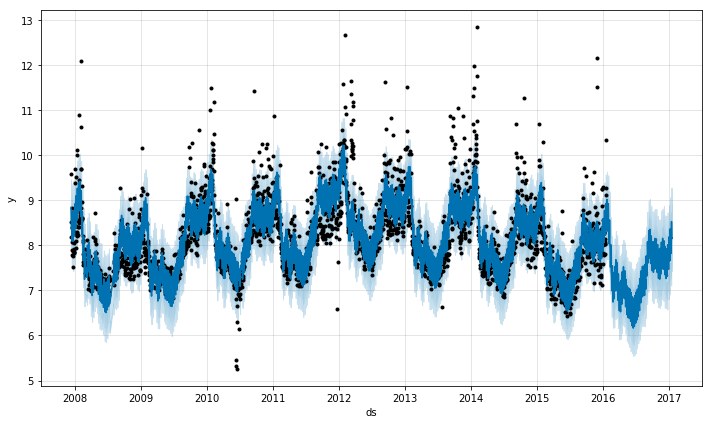

In [11]:
#plot forecast
fig1 = m.plot(forecast)

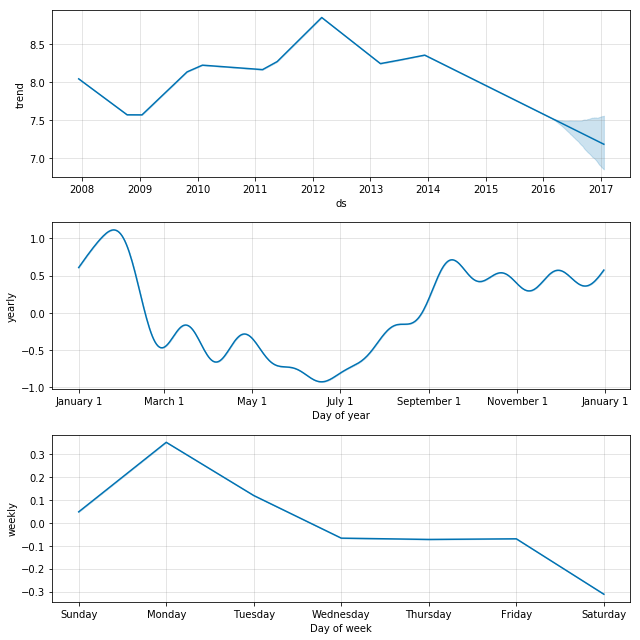

In [10]:
#Use the Prophet.plot_components method to see the forecast components: 
#the trend, yearly seasonality, and weekly seasonality of the time series.
fig2 = m.plot_components(forecast)